# Telecommunication plans analysis

In this project I will analyze the behavior of the clients of the telecommunications operator Megaline. 

The data is compiled from the cellular and internet communications of 500 clients during 2018. It includes the dates and durations of their calls, the dates and data volumes of their internet sessions, and the dates of their messaging. In addition we will use the personal details of the users, and finally the payment details of their communication plans.

The main goal of the steps is to find out which of 2 plans, "Surf" or "Ultimate", is more profitable, in order to advertise them accordingly.

The main steps will be:
- Exploring the data to learn its contents and to identify issues with its quality that should be addressed.
- Preparing the data for analysis by treating the discovered issues and calculating variables of interest in preparation for analysis, especially the revenues from the customers.
- Analyzing the data to study the differences in the communication consumptions of the users of the 2 plans.
- Testing hypotheses regarding the difference between the mean revenues from the users of the 2 plans, and from the users residing in the NY-NJ area versus those who live outside of it.
- Summarizing the overall findings.

## Loading & exploring data

### Importing libraries

In [46]:
# Importing the required libraries
import numpy as np # For mathematical tools, especially arrays
import pandas as pd # For general data analysis tools
import matplotlib.pyplot as plt # For 2D plotting
from scipy import stats as st # For statistical tools

### Loading data

In [47]:
# Selecting the type of runtime and loading the data file
# Three types of runtimes are supported:
# 1 - Local runtime
# 2 - Hosted runtime on the interactive Yandex platform
# 3 - Hosted runtime on Google colaboratory
runtime_type = 3

# Setting filepaths
filepath_yandex = '/datasets/'
filepath_google_colab = '/content/drive/My Drive/Colab Notebooks/Yandex Practicum/'

# Loading the data
if runtime_type == 1:
    print('A local runtime was chosen.\n')
    megaline_calls = pd.read_csv('megaline_calls.csv')
    megaline_internet = pd.read_csv('megaline_internet.csv')
    megaline_messages = pd.read_csv('megaline_messages.csv')
    megaline_plans = pd.read_csv('megaline_plans.csv')
    megaline_users = pd.read_csv('megaline_users.csv')

elif runtime_type == 2:
    print('A hosted runtime on Yandex interactive platform was chosen.\n')
    megaline_calls = pd.read_csv(filepath_yandex + 'megaline_calls.csv')
    megaline_internet = pd.read_csv(filepath_yandex + 'megaline_internet.csv')
    megaline_messages = pd.read_csv(filepath_yandex + 'megaline_messages.csv')
    megaline_plans = pd.read_csv(filepath_yandex + 'megaline_plans.csv')
    megaline_users = pd.read_csv(filepath_yandex + 'megaline_users.csv')

elif runtime_type == 3:
    print('A hosted runtime on Google colaboratory was chosen.\n')
    from google.colab import drive # For integration of files with Google drive
    drive.mount('/content/drive') # Mounting Google drive
    megaline_calls = pd.read_csv(filepath_google_colab + 'megaline_calls.csv')
    megaline_internet = pd.read_csv(filepath_google_colab + 'megaline_internet.csv')
    megaline_messages = pd.read_csv(filepath_google_colab + 'megaline_messages.csv')
    megaline_plans = pd.read_csv(filepath_google_colab + 'megaline_plans.csv')
    megaline_users = pd.read_csv(filepath_google_colab + 'megaline_users.csv')

else:
    print('Incorrect selection of a runtime type! Please set "runtime_type" to either "1", "2" or "3".')

A hosted runtime on Google colaboratory was chosen.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Exploring "megaline_calls"

In [48]:
# Looking at the general information
print('Printing the general information:\n')
megaline_calls.info()

print('Printing some of the first rows:\n')
display(megaline_calls.head(10))

Printing the general information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
Printing some of the first rows:



,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


Exploring the "duration" column:

count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64 

The median is: 5.98 



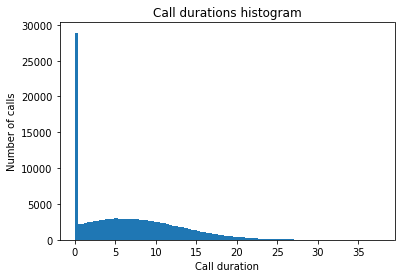

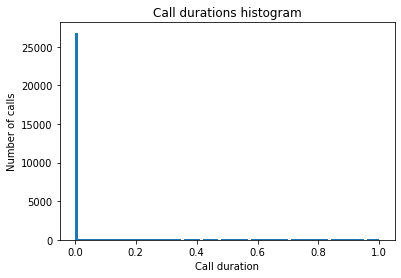

In [49]:
# Exploring the call durations
print('Exploring the "duration" column:\n')
print(megaline_calls['duration'].describe(), '\n')
print('The median is:', megaline_calls['duration'].median(), '\n')

megaline_calls['duration'].plot(kind='hist', bins=100, title='Call durations histogram')
plt.ylabel('Number of calls')
plt.xlabel('Call duration')
plt.show()

megaline_calls['duration'].plot(kind='hist', bins=100, range=(0,1), title='Call durations histogram')
plt.ylabel('Number of calls')
plt.xlabel('Call duration')
plt.show()

In [50]:
# Checking which percentage of the users have called
print('{:.2f}% of the users have called.'
    .format( 100 * len(megaline_calls['user_id'].unique()) / len(megaline_users) ))

96.20% of the users have called.


### Exploring "megaline_internet"

In [51]:
# Looking at the general information
print('Printing the general information:\n')
megaline_internet.info()

print('Printing some of the first rows:\n')
display(megaline_internet.head(10))

Printing the general information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
Printing some of the first rows:



,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


Exploring the "mb_used" column:

count    104825.000000
mean        366.713701
std         277.170542
min           0.000000
25%         136.080000
50%         343.980000
75%         554.610000
max        1693.470000
Name: mb_used, dtype: float64 

The median is: 343.98 



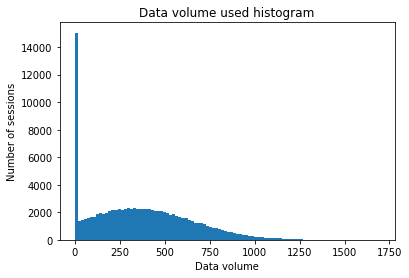

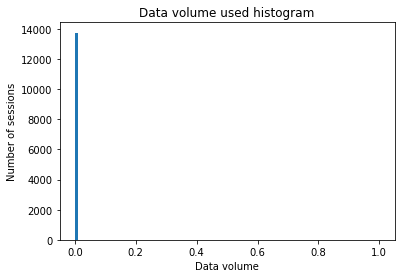

In [52]:
# Exploring the volume of used internet data
print('Exploring the "mb_used" column:\n')
print(megaline_internet['mb_used'].describe(), '\n')
print('The median is:', megaline_internet['mb_used'].median(), '\n')

megaline_internet['mb_used'].plot(kind='hist', bins=100, title='Data volume used histogram')
plt.ylabel('Number of sessions')
plt.xlabel('Data volume')
plt.show()

megaline_internet['mb_used'].plot(kind='hist', bins=100, range=(0,1), title='Data volume used histogram')
plt.ylabel('Number of sessions')
plt.xlabel('Data volume')
plt.show()

In [53]:
# Checking which percentage of the users have used the internet
print('{:.2f}% of the users have used the internet.'
    .format( 100 * len(megaline_internet['user_id'].unique()) / len(megaline_users) ))

97.80% of the users have used the internet.


### Exploring "megaline_messages"

In [54]:
# Looking at the general information
print('Printing the general information:\n')
megaline_messages.info()

print('Printing some of the first rows:\n')
display(megaline_messages.head(10))

Printing the general information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
Printing some of the first rows:



,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


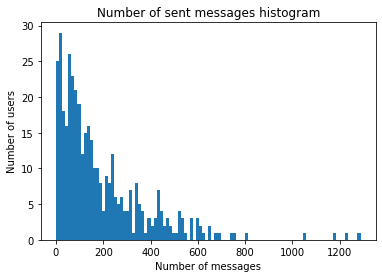

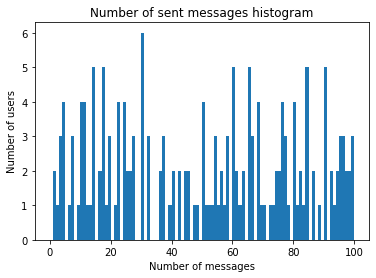

In [55]:
# Exploring the number of sent messages
messages_per_user = megaline_messages.pivot_table(index='user_id', values='id', aggfunc='count') # A data frame

messages_per_user['id'].plot(kind='hist', bins=100, title='Number of sent messages histogram')
plt.ylabel('Number of users')
plt.xlabel('Number of messages')
plt.show()

messages_per_user['id'].plot(kind='hist', bins=100, title='Number of sent messages histogram', range=(0,100))
plt.ylabel('Number of users')
plt.xlabel('Number of messages')
plt.show()

In [56]:
# Checking which percentage of the users have sent messages
print('{:.2f}% of the users have sent messages.'
    .format( 100 * len(megaline_messages['user_id'].unique()) / len(megaline_users) ))

80.40% of the users have sent messages.


### Exploring "megaline_plans"

In [57]:
# Looking at the general information
print('Printing the general information:\n')
megaline_plans.info()

print('Printing the data frame:\n')
pd.set_option('display.max_rows', 10) # Allows displaying the entire data frame
pd.set_option('display.max_columns', 10)
display(megaline_plans)

Printing the general information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
Printing the data frame:



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


### Exploring "megaline_users"

In [58]:
# Looking at the general information
print('Printing the general information:\n')
megaline_users.info()

print('Printing some of the first rows:\n')
display(megaline_users.head(10))

Printing the general information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
Printing some of the first rows:



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [59]:
# Exploring the cities of the users
print('The unique values in the "city" column are:\n', np.sort(megaline_users['city'].unique()))

The unique values in the "city" column are:
 ['Albany-Schenectady-Troy, NY MSA' 'Albuquerque, NM MSA'
 'Atlanta-Sandy Springs-Roswell, GA MSA'
 'Austin-Round Rock-Georgetown, TX MSA' 'Bakersfield, CA MSA'
 'Baltimore-Columbia-Towson, MD MSA' 'Baton Rouge, LA MSA'
 'Birmingham-Hoover, AL MSA' 'Boston-Cambridge-Newton, MA-NH MSA'
 'Bridgeport-Stamford-Norwalk, CT MSA' 'Buffalo-Cheektowaga, NY MSA'
 'Cape Coral-Fort Myers, FL MSA' 'Charleston-North Charleston, SC MSA'
 'Charlotte-Concord-Gastonia, NC-SC MSA'
 'Chicago-Naperville-Elgin, IL-IN-WI MSA' 'Cincinnati, OH-KY-IN MSA'
 'Cleveland-Elyria, OH MSA' 'Colorado Springs, CO MSA' 'Columbia, SC MSA'
 'Columbus, OH MSA' 'Dallas-Fort Worth-Arlington, TX MSA'
 'Dayton-Kettering, OH MSA' 'Denver-Aurora-Lakewood, CO MSA'
 'Detroit-Warren-Dearborn, MI MSA' 'El Paso, TX MSA' 'Fresno, CA MSA'
 'Grand Rapids-Kentwood, MI MSA' 'Greensboro-High Point, NC MSA'
 'Houston-The Woodlands-Sugar Land, TX MSA'
 'Indianapolis-Carmel-Anderson, IN MSA' 'Jackson

In [60]:
# Calculating the amount of users in each plan
users_num = len(megaline_users)
users_num_surf = len(megaline_users.query('plan == "surf"'))
users_num_ultimate = len(megaline_users.query('plan == "ultimate"'))
print('There are {} users in the "Surf" plan, which are {:.2f}% of the users.'
    .format(users_num_surf, 100*users_num_surf/users_num))
print('There are {} users in the "Ultimate" plan, which are {:.2f}% of the users.'
    .format(users_num_ultimate, 100*users_num_ultimate/users_num))

There are 339 users in the "Surf" plan, which are 67.80% of the users.
There are 161 users in the "Ultimate" plan, which are 32.20% of the users.


### Conclusion

We can identify some problems with the data, which we'll address in the following sections.

In the "megaline_calls" data frame:
- call_date - Should be converted into a datetime variable.
- duration - Has many 0 duration values. I note that I will not round up this variable or convert it into an integer in order to not lose information. The rounding up will be done when it's required to calculate the appropriate variables of interest.

In the "megaline_internet" data frame:
- session_date - Should be converted into a datetime variable.
- mb_used - Has many 0 duration values.

In the "megaline_messages" data frame:
- message_date - Should be converted into a datetime variable.

In the "megaline_plans" data frame:
- No issues found.

In the "megaline_users" data frame:
- reg_date - Should be converted into a datetime variable.
- churn_date - Should be converted into a datetime variable. Has missing values, but they're missing not at random (MNAR).

## Preparing data

### Treating incorrect values

In [61]:
# Checking the amount of values which are nullified
print('The percent of calls with a duration of 0 minutes is: {:.2f}%.'
    .format( 100 * len(megaline_calls.query('duration == 0')) / len(megaline_calls) ))
print('The percent of data volume usage of 0 MBs is: {:.2f}%.\n'
    .format( 100 * len(megaline_internet.query('mb_used == 0')) / len(megaline_internet) ))

The percent of calls with a duration of 0 minutes is: 19.48%.
The percent of data volume usage of 0 MBs is: 13.11%.



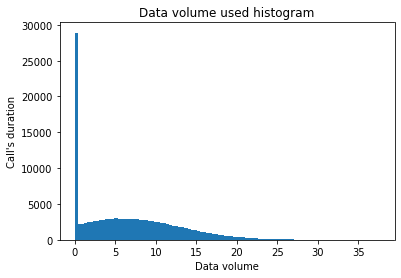

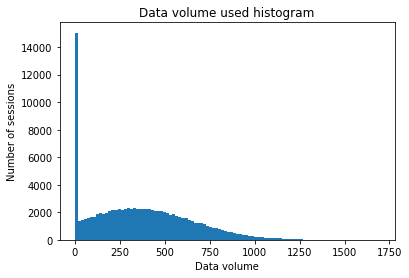

In [62]:
# the review code:
megaline_calls['duration'].plot(kind='hist', bins=100, title='Data volume used histogram')
plt.ylabel('Call\'s duration')
plt.xlabel('Data volume')
plt.show()

megaline_internet['mb_used'].plot(kind='hist', bins=100, title='Data volume used histogram')
plt.ylabel('Number of sessions')
plt.xlabel('Data volume')
plt.show()


### Treating missing values

In [63]:
# Looking for missing values
print('The percentages of missing values per column in the "megaline_calls" data frame are:\n{}.\n'
    .format(megaline_calls.isna().sum()*100 / len(megaline_calls)))

print('The percentages of missing values per column in the "megaline_internet" data frame are:\n{}.\n'
    .format(megaline_internet.isna().sum()*100 / len(megaline_internet)))

print('The percentages of missing values per column in the "megaline_messages" data frame are:\n{}.\n'
    .format(megaline_messages.isna().sum()*100 / len(megaline_messages)))

print('The percentages of missing values per column in the "megaline_users" data frame are:\n{}.\n'
    .format(megaline_users.isna().sum()*100 / len(megaline_users)))

The percentages of missing values per column in the "megaline_calls" data frame are:
id           0.0
user_id      0.0
call_date    0.0
duration     0.0
dtype: float64.

The percentages of missing values per column in the "megaline_internet" data frame are:
id              0.0
user_id         0.0
session_date    0.0
mb_used         0.0
dtype: float64.

The percentages of missing values per column in the "megaline_messages" data frame are:
id              0.0
user_id         0.0
message_date    0.0
dtype: float64.

The percentages of missing values per column in the "megaline_users" data frame are:
user_id        0.0
first_name     0.0
last_name      0.0
age            0.0
city           0.0
reg_date       0.0
plan           0.0
churn_date    93.2
dtype: float64.



### Treating data types

In [64]:
# Converting strings to datetime variables
date_format = '%Y-%m-%d'
megaline_calls['call_date'] = pd.to_datetime(megaline_calls['call_date'], format=date_format)
megaline_internet['session_date'] = pd.to_datetime(megaline_internet['session_date'], format=date_format)
megaline_messages['message_date'] = pd.to_datetime(megaline_messages['message_date'], format=date_format)
megaline_users['reg_date'] = pd.to_datetime(megaline_users['reg_date'], format=date_format)
megaline_users['churn_date'] = pd.to_datetime(megaline_users['churn_date'], format=date_format)

### Treating duplicates

In [65]:
# Looking for duplicated rows
print('The total number of duplicated rows in the "megaline_calls" data frame is {}.\n'
    .format(megaline_calls.duplicated().sum()))

print('The total number of duplicated rows in the "megaline_internet" data frame is {}.\n'
    .format(megaline_internet.duplicated().sum()))

print('The total number of duplicated rows in the "megaline_messages" data frame is {}.\n'
    .format(megaline_messages.duplicated().sum()))

print('The total number of duplicated rows in the "megaline_users" data frame is {}.'
    .format(megaline_users.duplicated().sum()))

The total number of duplicated rows in the "megaline_calls" data frame is 0.

The total number of duplicated rows in the "megaline_internet" data frame is 0.

The total number of duplicated rows in the "megaline_messages" data frame is 0.

The total number of duplicated rows in the "megaline_users" data frame is 0.


### Calculating & rounding variables

In [66]:
# Adding the month in which every communication occured
megaline_calls['month'] = megaline_calls['call_date'].dt.month
megaline_internet['month'] = megaline_internet['session_date'].dt.month
megaline_messages['month'] = megaline_messages['message_date'].dt.month

Calculating the number of calls and calls durations for all of the users.



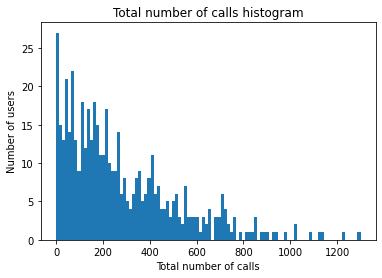

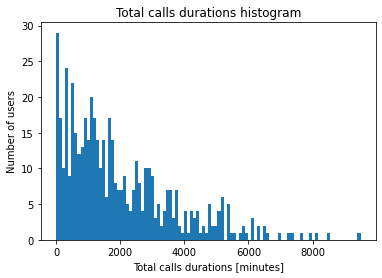

In [67]:
# Calculating the number of calls and calls durations for all of the users, while rounding
print('Calculating the number of calls and calls durations for all of the users.\n')

# Finding the users who used calls
users_who_called = megaline_calls['user_id'].unique() # A numpy array of integers

# Rounding up the seconds to minutes in the calls durations
megaline_calls['duration_rounded'] = np.ceil(megaline_calls['duration'])

# Calculating the number of calls and the calls duration for every month for the users who used calls
calls_every_month_users_who_called = \
    megaline_calls.pivot_table(index='user_id', columns='month', values='duration', aggfunc='count') # A data frame
calls_every_month_users_who_called.fillna(0, inplace=True)

minutes_rounded_every_month_users_who_called = \
    megaline_calls.pivot_table(index='user_id', columns='month', values='duration_rounded', aggfunc='sum')
minutes_rounded_every_month_users_who_called.fillna(0, inplace=True)

# Adding the users who didn't use calls
calls_every_month_every_user = calls_every_month_users_who_called.copy()
minutes_rounded_every_month_every_user = minutes_rounded_every_month_users_who_called.copy()
for row in range(0,len(megaline_users)):
    user_id = megaline_users.loc[row,'user_id']
    if user_id not in users_who_called: # If the user didn't use calls
        calls_every_month_every_user.loc[user_id,:] = 0
        minutes_rounded_every_month_every_user.loc[user_id,:] = 0

# Renaming axes and sorting by the user ids
calls_every_month_every_user = calls_every_month_every_user \
    .rename_axis(None, axis="index").rename_axis(None, axis="columns").sort_index(axis=0, ascending=True)
minutes_rounded_every_month_every_user = minutes_rounded_every_month_every_user \
    .rename_axis(None, axis="index").rename_axis(None, axis="columns").sort_index(axis=0, ascending=True)

# Calculating the total number of calls and total calls duration for all of the users
total_calls = calls_every_month_every_user.sum(axis=1).reset_index(drop=True)
total_minutes_rounded = minutes_rounded_every_month_every_user.sum(axis=1).reset_index(drop=True)

# Plotting
total_calls.plot(kind='hist', bins=100, title='Total number of calls histogram')
plt.ylabel('Number of users')
plt.xlabel('Total number of calls')
plt.show()
print('\n')

total_minutes_rounded.plot(kind='hist', bins=100, title='Total calls durations histogram')
plt.ylabel('Number of users')
plt.xlabel('Total calls durations [minutes]')
plt.show()

Calculating the number of internet traffic for all of the users.



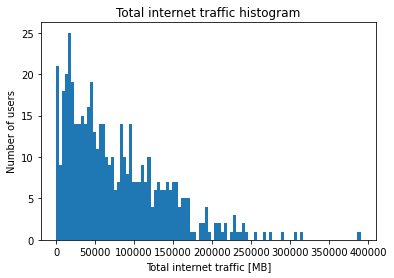

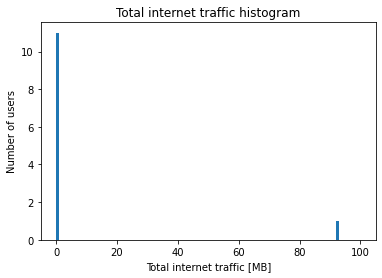

In [68]:
# Calculating the number of internet traffic for all of the users
print('Calculating the number of internet traffic for all of the users.\n')

# Finding the users who surfed the internet
users_who_surfed = megaline_internet['user_id'].unique() # A numpy array of integers

# Calculating the number of internet traffic for every month for the users who surfed the internet
mbs_every_month_users_who_surfed = \
    megaline_internet.pivot_table(index='user_id', columns='month', values='mb_used', aggfunc='sum') # A data frame
mbs_every_month_users_who_surfed.fillna(0, inplace=True)

# Adding the users who didn't surf the internet
mbs_every_month_every_user = mbs_every_month_users_who_surfed.copy()
for row in range(0,len(megaline_users)):
    user_id = megaline_users.loc[row,'user_id']
    if user_id not in users_who_surfed: # If the user didn't surf the internet
        mbs_every_month_every_user.loc[user_id,:] = 0

# Renaming axes and sorting by the user ids
mbs_every_month_every_user = mbs_every_month_every_user \
    .rename_axis(None, axis="index").rename_axis(None, axis="columns").sort_index(axis=0, ascending=True)
gbs_every_month_every_user = mbs_every_month_every_user / 1024

# Rounding up the monthly internet traffic in GBs
gbs_rounded_every_month_every_user = np.ceil(gbs_every_month_every_user)

# Calculating the total internet traffic for all of the users
total_mbs = mbs_every_month_every_user.sum(axis=1).reset_index(drop=True)
total_gbs = gbs_every_month_every_user.sum(axis=1).reset_index(drop=True)

# Plotting
total_mbs.plot(kind='hist', bins=100, title='Total internet traffic histogram')
plt.ylabel('Number of users')
plt.xlabel('Total internet traffic [MB]')
plt.show()

total_mbs.plot(kind='hist', bins=100, title='Total internet traffic histogram', range=(0,100))
plt.ylabel('Number of users')
plt.xlabel('Total internet traffic [MB]')
plt.show()

Calculating the number of sent messages for all of the users.



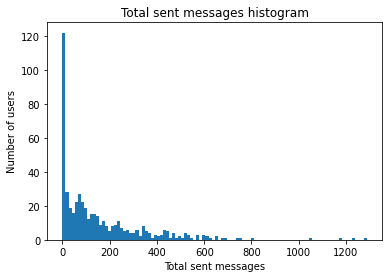

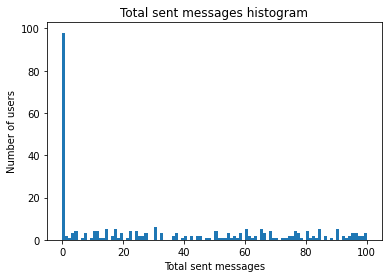

In [69]:
# Calculating the number of sent messages for all of the users
print('Calculating the number of sent messages for all of the users.\n')

# Finding the users who sent messages
users_who_messaged = megaline_messages['user_id'].unique() # A numpy array of integers

# Calculating the number of messages for every month for the users who messaged
messages_every_month_users_who_messaged = \
    megaline_messages.pivot_table(index='user_id', columns='month', values='id', aggfunc='count') # A data frame
messages_every_month_users_who_messaged.fillna(0, inplace=True)

# Adding the users who didn't surf the internet
messages_every_month_every_user = messages_every_month_users_who_messaged.copy()
for row in range(0,len(megaline_users)):
    user_id = megaline_users.loc[row,'user_id']
    if user_id not in users_who_messaged: # If the user didn't send messages
        messages_every_month_every_user.loc[user_id,:] = 0

# Renaming axes and sorting by the user ids
messages_every_month_every_user = messages_every_month_every_user \
    .rename_axis(None, axis="index").rename_axis(None, axis="columns").sort_index(axis=0, ascending=True)

# Calculating the total number of messages for all of the users
total_messages = messages_every_month_every_user.sum(axis=1).reset_index(drop=True)

# Plotting
total_messages.plot(kind='hist', bins=100, title='Total sent messages histogram')
plt.ylabel('Number of users')
plt.xlabel('Total sent messages')
plt.show()

total_messages.plot(kind='hist', bins=100, title='Total sent messages histogram', range=(0,100))
plt.ylabel('Number of users')
plt.xlabel('Total sent messages')
plt.show()

In [70]:
# the reviewer code:
tmp = (megaline_calls
           .groupby(['user_id','month'])
           .agg({'duration_rounded' : 'sum', 'duration_rounded' : 'count'})
           .reset_index()).merge(
       (megaline_internet
            .groupby(['user_id','month'])
            .agg({'mb_used' : 'sum'})
            .reset_index()), on = ['user_id','month'], how = 'outer').merge(
       (megaline_messages
            .groupby(['user_id','month'])
            .agg({'id' : 'count'})
            .reset_index()), on = ['user_id','month'], how = 'outer')
tmp

,user_id,month,duration_rounded,mb_used,id
0,1000,12,16.0,1901.47,11.0
1,1001,8,27.0,6919.15,30.0
2,1001,9,49.0,13314.82,44.0
3,1001,10,65.0,22330.49,53.0
4,1001,11,64.0,18504.30,36.0
...,...,...,...,...,...
2288,1349,10,NaN,13093.55,76.0
2289,1349,11,NaN,17128.26,72.0
2290,1349,12,NaN,13039.91,61.0
2291,1361,5,NaN,1519.69,2.0


<div class="alert alert-warning" role="alert">

</div>

Calculating the number of months a user was registered.



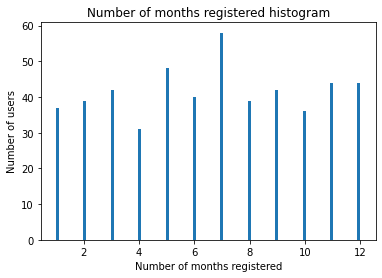

In [71]:
# Calculating the number of months each user was registered
print('Calculating the number of months a user was registered.\n')
for row in range(0,len(megaline_users)):
    # Calculating the number of months each user was registered
    # Being a customer for a part of a month is counted as a full month, so I add 1, and this prevents division by 0
    if pd.isna(megaline_users.loc[row,'churn_date']): # If the customer stayed registered until the end of 2018
        megaline_users.loc[row,'months_reg'] = 12 - megaline_users.loc[row,'reg_date'].month + 1
    else:
        megaline_users.loc[row,'months_reg'] = \
            megaline_users.loc[row,'churn_date'].month - megaline_users.loc[row,'reg_date'].month + 1

# Plotting
megaline_users['months_reg'].plot(kind='hist', bins=100, title='Number of months registered histogram')
plt.ylabel('Number of users')
plt.xlabel('Number of months registered')
plt.show()

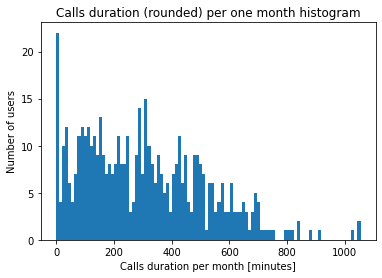

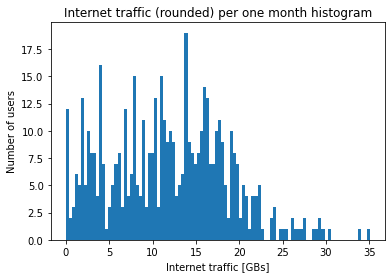

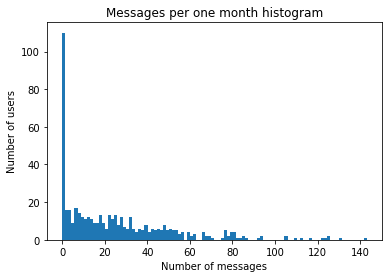

In [72]:
# Calculating the communication amounts per one month of registration
minutes_rounded_per_one_month = minutes_rounded_every_month_every_user \
    .sum(axis=1).reset_index(drop = True) / megaline_users['months_reg']
gbs_rounded_per_one_month = gbs_rounded_every_month_every_user \
    .sum(axis=1).reset_index(drop = True) / megaline_users['months_reg']
messages_per_one_month = messages_every_month_every_user \
    .sum(axis=1).reset_index(drop = True) / megaline_users['months_reg']

# Plotting
minutes_rounded_per_one_month.plot(kind='hist', bins=100, title='Calls duration (rounded) per one month histogram')
plt.ylabel('Number of users')
plt.xlabel('Calls duration per month [minutes]')
plt.show()
print()

gbs_rounded_per_one_month.plot(kind='hist', bins=100, title='Internet traffic (rounded) per one month histogram')
plt.ylabel('Number of users')
plt.xlabel('Internet traffic [GBs]')
plt.show()
print()

messages_per_one_month.plot(kind='hist', bins=100, title='Messages per one month histogram')
plt.ylabel('Number of users')
plt.xlabel('Number of messages')
plt.show()

### Calculating revenue

In [73]:
# Calculating the revenue for every month for every user
# Creating a data frame filled with zeroes that will contain the revenues
revenue_every_month_every_user = pd.DataFrame(data=0, index=megaline_users['user_id'], columns=range(1,13)) \
    .rename_axis(None, axis="index").rename_axis(None, axis="columns")

# Calculating the revenues
for row in range(0,len(megaline_users)):
    user_id = megaline_users.loc[row,'user_id']
    month_reg = megaline_users.loc[row,'reg_date'].month # Month of registration
    for month in range(month_reg,13): # Going over the months of registration
        plan = megaline_users.loc[row,'plan']
        plan_details = megaline_plans.query('plan_name == @plan').reset_index(drop = True)
        # Resetting the index allows always using "0" for the row

        monthly_charge = plan_details.loc[0,'usd_monthly_pay']
        
        minutes_exceeding = \
            minutes_rounded_every_month_every_user.loc[user_id,month] - plan_details.loc[0,'minutes_included']
        if minutes_exceeding < 0: # The user didn't exceed the limits of the plan
            calls_exceeding_revenue = 0
        else:
            calls_exceeding_revenue = minutes_exceeding * plan_details.loc[0,'usd_per_minute']
       
        gbs_exceeding = \
            gbs_rounded_every_month_every_user.loc[user_id,month] - plan_details.loc[0,'mb_per_month_included']/1024
        if gbs_exceeding < 0: # The user didn't exceed the limits of the plan
            internet_exceeding_revenue = 0
        else:
            internet_exceeding_revenue = gbs_exceeding * plan_details.loc[0,'usd_per_gb']
        
        messages_exceeding = \
            messages_every_month_every_user.loc[user_id,month] - plan_details.loc[0,'messages_included']
        if messages_exceeding < 0: # The user didn't exceed the limits of the plan
            messages_exceeding_revenue = 0
        else:
            messages_exceeding_revenue = messages_exceeding * plan_details.loc[0,'usd_per_message']

        revenue_every_month_every_user.loc[user_id,month] = \
            monthly_charge + calls_exceeding_revenue + internet_exceeding_revenue + messages_exceeding_revenue

print('Printing the general information of the monthly revenue data frame:\n')
revenue_every_month_every_user.info()
print('\n')
print('Printing the first rows of the monthly revenue data frame:\n')
display(revenue_every_month_every_user.head(10))

Printing the general information of the monthly revenue data frame:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1000 to 1499
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       500 non-null    int64  
 1   2       500 non-null    float64
 2   3       500 non-null    float64
 3   4       500 non-null    float64
 4   5       500 non-null    float64
 5   6       500 non-null    float64
 6   7       500 non-null    float64
 7   8       500 non-null    float64
 8   9       500 non-null    float64
 9   10      500 non-null    float64
 10  11      500 non-null    float64
 11  12      500 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 70.8 KB


Printing the first rows of the monthly revenue data frame:



,1,2,3,4,5,...,8,9,10,11,12
1000,0,0.0,0.0,0.0,0.00,...,0.00,0.00,0.00,0.00,70.00
1001,0,0.0,0.0,0.0,0.00,...,20.00,20.00,90.09,60.00,60.00
1002,0,0.0,0.0,0.0,0.00,...,0.00,0.00,20.00,60.00,20.00
1003,20,20.0,20.0,20.0,20.00,...,20.00,20.00,20.00,20.00,158.12
1004,0,0.0,0.0,0.0,20.00,...,150.00,60.00,20.00,90.00,80.00
1005,0,0.0,0.0,0.0,0.00,...,0.00,0.00,0.00,20.00,40.00
1006,0,0.0,0.0,0.0,0.00,...,0.00,0.00,0.00,70.00,84.00
1007,0,0.0,0.0,0.0,0.00,...,110.03,150.00,244.62,110.72,163.51
1008,0,0.0,0.0,0.0,0.00,...,70.00,70.00,70.00,70.00,70.00
1009,0,0.0,0.0,20.0,71.02,...,116.93,88.28,107.20,126.42,117.68


### Conclusion

I have treated the following incorrect values:
- "duration" in "megaline_calls" and "mb_used" in "megaline_internet" - Had many 0 values. I didn't remove them due to their non-negligible percentage, and I didn't replace them with the corresponding mean or median since communications like these can occur - for example, a user can call but not get an answer.

I have treated the following missing values:
- "churn_date" in "megaline_users" - Had missing values, but they were missing not at random (MNAR), since the values were missing when the corresponding user didn't stop using the service. Therefore I didn't fill them and will take into account this reason when analyzing the column.

I have treated the data types of the following variables:
- "call_date" in "megaline_calls", "session_date" in "megaline_internet", "message_date" in "megaline_messages", "reg_date" in "megaline_users" and "churn_date" in "megaline_users" - These were converted into a datetime variables, since they're dates.

The data didn't contain duplicated rows.

Finally, I have calculated variables of interest, and in particular the revenue from every user, which will be analyzed in the following sections.

## Analyzing data

In this section I will analyze the prepared data in order to describe the typical behavior of the customers. To do so, I will calculate the amount of minutes, texts, and internet traffic that the users of each plan use per month. For these variables, I will calculate the mean, variance, and standard deviation, then plot their histograms, and finally describe the obtained distributions.

### Grouping data

In [74]:
# Grouping the data by the plans
user_ids_surf = megaline_users.query('plan == "surf"')['user_id'].values # A numpy array of integers
user_ids_ultimate = megaline_users.query('plan == "ultimate"')['user_id'].values

user_rows_surf = megaline_users.query('plan == "surf"').index.values # A numpy array of integers
user_rows_ultimate = megaline_users.query('plan == "ultimate"').index.values

minutes_rounded_per_one_month_surf = minutes_rounded_per_one_month.loc[user_rows_surf]
gbs_rounded_per_one_month_surf = gbs_rounded_per_one_month.loc[user_rows_surf]
messages_per_one_month_surf = messages_per_one_month.loc[user_rows_surf]

minutes_rounded_per_one_month_ultimate = minutes_rounded_per_one_month.loc[user_rows_ultimate]
gbs_rounded_per_one_month_ultimate = gbs_rounded_per_one_month.loc[user_rows_ultimate]
messages_per_one_month_ultimate = messages_per_one_month.loc[user_rows_ultimate]

### Analyzing "Surf" plan users

count     339.000000
mean      311.999264
std       206.018717
min         0.000000
25%       139.150000
50%       293.444444
75%       452.222222
max      1055.000000
dtype: float64 

The mean is 312.00, the variance is 42443.71 and the standard deviation is 206.02.



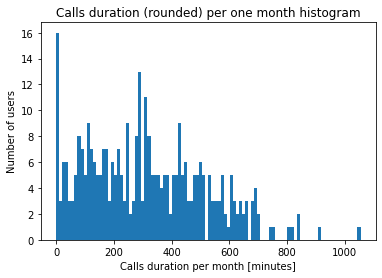

In [75]:
# Calls durations per one month
print(minutes_rounded_per_one_month_surf.describe(), '\n')
statistics_surf_minutes = 'The mean is {:.2f}, the variance is {:.2f} and the standard deviation is {:.2f}.\n' \
    .format(minutes_rounded_per_one_month_surf.mean(),
            minutes_rounded_per_one_month_surf.var(),
            minutes_rounded_per_one_month_surf.std())
print(statistics_surf_minutes)

# Plotting
minutes_rounded_per_one_month_surf.plot(kind='hist', bins=100, title='Calls duration (rounded) per one month histogram')
plt.ylabel('Number of users')
plt.xlabel('Calls duration per month [minutes]')
plt.show()

count    339.000000
mean      11.981181
std        6.795134
min        0.000000
25%        6.720779
50%       12.000000
75%       16.666667
max       34.000000
dtype: float64 

The mean is 11.98, the variance is 46.17 and the standard deviation is 6.80.



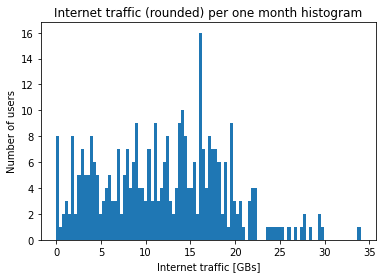

In [76]:
# Internet traffic per one month
print(gbs_rounded_per_one_month_surf.describe(), '\n')
statistics_surf_gbs = 'The mean is {:.2f}, the variance is {:.2f} and the standard deviation is {:.2f}.\n' \
    .format(gbs_rounded_per_one_month_surf.mean(),
            gbs_rounded_per_one_month_surf.var(),
            gbs_rounded_per_one_month_surf.std())
print(statistics_surf_gbs)

# Plotting
gbs_rounded_per_one_month_surf.plot(kind='hist', bins=100, title='Internet traffic (rounded) per one month histogram')
plt.ylabel('Number of users')
plt.xlabel('Internet traffic [GBs]')
plt.show()

count    339.000000
mean      23.927407
std       26.102630
min        0.000000
25%        2.533333
50%       18.000000
75%       35.652778
max      130.555556
dtype: float64 

The mean is 23.93, the variance is 681.35 and the standard deviation is 26.10.



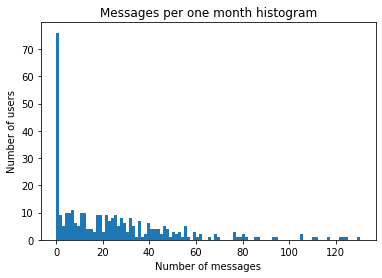

In [77]:
# Messages per one month
print(messages_per_one_month_surf.describe(), '\n')
statistics_surf_messages = 'The mean is {:.2f}, the variance is {:.2f} and the standard deviation is {:.2f}.\n' \
    .format(messages_per_one_month_surf.mean(),
            messages_per_one_month_surf.var(),
            messages_per_one_month_surf.std())
print(statistics_surf_messages)

# Plotting
messages_per_one_month_surf.plot(kind='hist', bins=100, title='Messages per one month histogram')
plt.ylabel('Number of users')
plt.xlabel('Number of messages')
plt.show()

### Analyzing "Ultimate" plan users

count     161.000000
mean      293.291137
std       220.360620
min         0.000000
25%       123.454545
50%       238.571429
75%       444.375000
max      1054.571429
dtype: float64 

The mean is 293.29, the variance is 48558.80 and the standard deviation is 220.36.



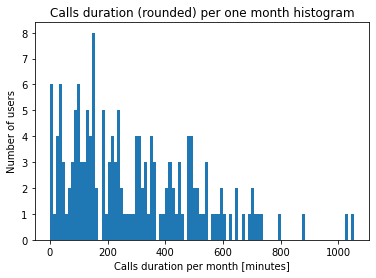

In [78]:
# Calls durations per one month
print(minutes_rounded_per_one_month_ultimate.describe(), '\n')
statistics_ultimate_minutes = 'The mean is {:.2f}, the variance is {:.2f} and the standard deviation is {:.2f}.\n' \
    .format(minutes_rounded_per_one_month_ultimate.mean(),
            minutes_rounded_per_one_month_ultimate.var(),
            minutes_rounded_per_one_month_ultimate.std())
print(statistics_ultimate_minutes)

# Plotting
minutes_rounded_per_one_month_ultimate.plot(kind='hist', bins=100, title='Calls duration (rounded) per one month histogram')
plt.ylabel('Number of users')
plt.xlabel('Calls duration per month [minutes]')
plt.show()

count    161.000000
mean      11.560374
std        6.899370
min        0.000000
25%        6.250000
50%       11.500000
75%       16.000000
max       35.090909
dtype: float64 

The mean is 11.56, the variance is 47.60 and the standard deviation is 6.90.



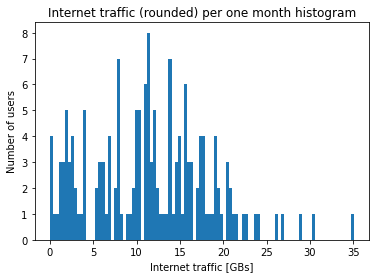

In [79]:
# Internet traffic per one month
print(gbs_rounded_per_one_month_ultimate.describe(), '\n')
statistics_ultimate_gbs = 'The mean is {:.2f}, the variance is {:.2f} and the standard deviation is {:.2f}.\n' \
    .format(gbs_rounded_per_one_month_ultimate.mean(),
            gbs_rounded_per_one_month_ultimate.var(),
            gbs_rounded_per_one_month_ultimate.std())
print(statistics_ultimate_gbs)

# Plotting
gbs_rounded_per_one_month_ultimate.plot(kind='hist', bins=100, title='Internet traffic (rounded) per one month histogram')
plt.ylabel('Number of users')
plt.xlabel('Internet traffic [GBs]')
plt.show()

count    161.000000
mean      26.690483
std       27.796586
min        0.000000
25%        3.500000
50%       18.000000
75%       45.000000
max      143.111111
dtype: float64 

The mean is 26.69, the variance is 772.65 and the standard deviation is 27.80.



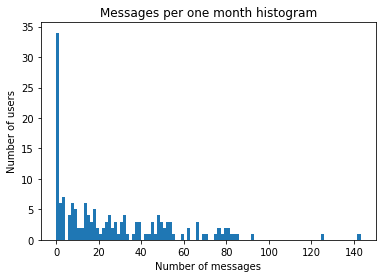

In [80]:
# Messages per one month
print(messages_per_one_month_ultimate.describe(), '\n')
statistics_ultimate_messages = 'The mean is {:.2f}, the variance is {:.2f} and the standard deviation is {:.2f}.\n' \
    .format(messages_per_one_month_ultimate.mean(),
            messages_per_one_month_ultimate.var(),
            messages_per_one_month_ultimate.std())
print(statistics_ultimate_messages)

# Plotting
messages_per_one_month_ultimate.plot(kind='hist', bins=100, title='Messages per one month histogram')
plt.ylabel('Number of users')
plt.xlabel('Number of messages')
plt.show()

In [81]:
# Summarizing statistics
print('"Surf" monthly call duration (minutes):', statistics_surf_minutes)
print('"Ultimate" monthly call duration (minutes):', statistics_ultimate_minutes)

print('"Surf" monthly internet traffic (GBs):', statistics_surf_gbs)
print('"Ultimate" monthly internet traffic (GBs):', statistics_ultimate_gbs)

print('"Surf" monthly messages sent:', statistics_surf_messages)
print('"Ultimate" monthly messages sent:', statistics_ultimate_messages)

"Surf" monthly call duration (minutes): The mean is 312.00, the variance is 42443.71 and the standard deviation is 206.02.

"Ultimate" monthly call duration (minutes): The mean is 293.29, the variance is 48558.80 and the standard deviation is 220.36.

"Surf" monthly internet traffic (GBs): The mean is 11.98, the variance is 46.17 and the standard deviation is 6.80.

"Ultimate" monthly internet traffic (GBs): The mean is 11.56, the variance is 47.60 and the standard deviation is 6.90.

"Surf" monthly messages sent: The mean is 23.93, the variance is 681.35 and the standard deviation is 26.10.

"Ultimate" monthly messages sent: The mean is 26.69, the variance is 772.65 and the standard deviation is 27.80.



### Conclusion

We see that the values of the different statistics are quite similar in both of the plans. On average, the users use calls for around 300 minutes per month, use around 12 GBs of internet traffic per month and send about 25 messages per month. The standard deviations are quite large though, and the individual communication consumptions of the users can vary a lot. In particular, some users don't use some of the communication methods at all. The low usage of the messaging service can be explained by the common usage of messaging apps.

In summary, the statistics of the two telecom plans are:
- "Surf" monthly call duration (minutes): The mean is 312.00, the variance is 42443.71 and the standard deviation is 206.02.

- "Ultimate" monthly call duration (minutes): The mean is 293.29, the variance is 48558.80 and the standard deviation is 220.36.

- "Surf" monthly internet traffic (GBs): The mean is 11.98, the variance is 46.17 and the standard deviation is 6.80.

- "Ultimate" monthly internet traffic (GBs): The mean is 11.56, the variance is 47.60 and the standard deviation is 6.90.

- "Surf" monthly messages sent: The mean is 23.93, the variance is 681.35 and the standard deviation is 26.10.

- "Ultimate" monthly messages sent: The mean is 26.69, the variance is 772.65 and the standard deviation is 27.80.

The distributions for a given communication method for both plans look pretty similar, which is expected since the statistics are very close. When looking at the peaks of the histograms, a peak appears at 0 due to some customers not using the corresponding communication method. The histograms are relatively spread out and are positively-skewed due to many outliers, where the internet traffic histogram is the closest to being symmetric. This is expressed in the large standard deviations.

## Testing hypotheses

### Hypothesis about plans

Printing statistics of the monthly revenue of "Surf" users:
 count    339.000000
mean      26.885737
std       24.150648
min        1.666667
25%       10.277500
50%       21.405833
75%       33.971250
max      155.905000
dtype: float64 



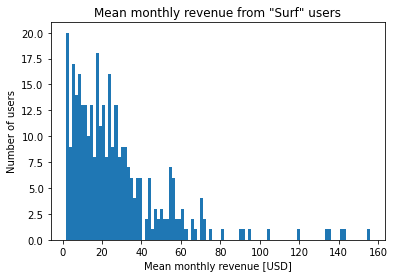



Printing statistics of the monthly revenue of "Ultimate" users:
 count    161.000000
mean      40.282609
std       20.906850
min        5.833333
25%       23.333333
50%       40.833333
75%       58.333333
max      109.083333
dtype: float64 



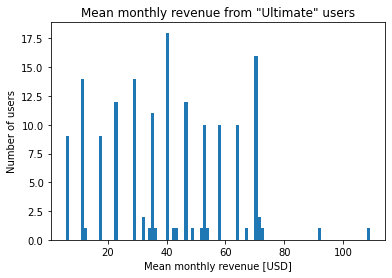

In [82]:
# Testing the hypothesis that the average revenues from users of "Surf" and "Ultimate" plans differs
user_ids_surf = megaline_users.query('plan == "surf"')['user_id'].values # Numpy array of integers
user_ids_ultimate = megaline_users.query('plan == "ultimate"')['user_id'].values

series_revenue_montly_mean_surf = revenue_every_month_every_user \
    .loc[user_ids_surf,:].mean(axis=1) # Series of the mean revenue from "Surf" plan users
series_revenue_montly_mean_ultimate = revenue_every_month_every_user \
    .loc[user_ids_ultimate,:].mean(axis=1)

sample_surf = series_revenue_montly_mean_surf.values # List of the mean revenue from "Surf" plan users
sample_ultimate = series_revenue_montly_mean_ultimate.values

# Exploring the samples
print('Printing statistics of the monthly revenue of "Surf" users:\n',
      series_revenue_montly_mean_surf.describe(), '\n')

plt.hist(sample_surf, bins=100)
plt.title('Mean monthly revenue from "Surf" users')
plt.ylabel('Number of users')
plt.xlabel('Mean monthly revenue [USD]')
plt.show()
print('\n')

print('Printing statistics of the monthly revenue of "Ultimate" users:\n',
      series_revenue_montly_mean_ultimate.describe(), '\n')

plt.hist(sample_ultimate, bins=100)
plt.title('Mean monthly revenue from "Ultimate" users')
plt.ylabel('Number of users')
plt.xlabel('Mean monthly revenue [USD]')
plt.show()

In [83]:
# Testing the hyopthesis
print('The null hypothesis is that the average revenues from users of "Surf" and "Ultimate" plans are equal.')

alpha = 0.05 # The critical statistical significance level
results = st.ttest_ind(sample_surf, sample_ultimate, equal_var=False)
print('The critical statistical significance level: {:.3f}'.format(alpha))
print('The p-value is: {:.3f}'.format(results.pvalue))

if results.pvalue < alpha: # If the p-value is less than the critical statistical significance level
    print("The null hypothesis is rejected.")
else:
    print("The null hypothesis can't be rejected.")

The null hypothesis is that the average revenues from users of "Surf" and "Ultimate" plans are equal.
The critical statistical significance level: 0.050
The p-value is: 0.000
The null hypothesis is rejected.


### Hypothesis about cities

In [84]:
# Testing the hypothesis that the average revenues from users in NY-NJ area is different from that of the users from other regions
# Preparing the variables of interest
user_ids_ny_nj = megaline_users \
    .query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['user_id'].values # Numpy array of integers
user_ids_not_ny_nj = megaline_users \
    .query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['user_id'].values

df_ny_nj_surf = megaline_users \
    .query('(city == "New York-Newark-Jersey City, NY-NJ-PA MSA") and (plan == "surf")') # Data frame
df_ny_nj_ultimate = megaline_users \
    .query('(city == "New York-Newark-Jersey City, NY-NJ-PA MSA") and (plan == "ultimate")')
df_not_ny_nj_surf = megaline_users \
    .query('(city != "New York-Newark-Jersey City, NY-NJ-PA MSA") and (plan == "surf")')
df_not_ny_nj_ultimate = megaline_users \
    .query('(city != "New York-Newark-Jersey City, NY-NJ-PA MSA") and (plan == "ultimate")')

series_revenue_montly_mean_ny_nj = \
    revenue_every_month_every_user.loc[user_ids_ny_nj,:].mean(axis=1) # Series of the mean revenue from "Surf" plan users
series_revenue_montly_mean_not_ny_nj = revenue_every_month_every_user.loc[user_ids_not_ny_nj,:].mean(axis=1)

sample_ny_nj = series_revenue_montly_mean_ny_nj.values # A list of the mean revenue from "Surf" plan users
sample_not_ny_nj = series_revenue_montly_mean_not_ny_nj.values

Printing statistics of the monthly revenue of NY-NJ area users:
 count    80.000000
mean     30.094115
std      21.426417
min       1.666667
25%      12.351042
50%      25.522917
75%      39.789583
max      91.497500
dtype: float64 

The percent of NY-NJ area users in the "Surf" plan is 75.00%.
The percent of NY-NJ area users in the "Ultimate" plan is 25.00%.



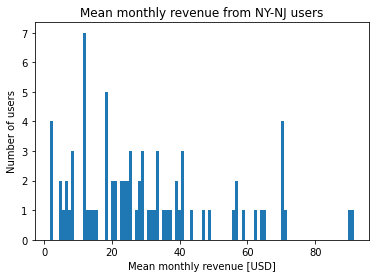



Printing statistics of the monthly revenue of users outside the NY-NJ area:
 count    420.000000
mean      31.410085
std       24.440365
min        1.666667
25%       12.394792
50%       25.376250
75%       45.676042
max      155.905000
dtype: float64 

The percent of non NY-NJ area users in the "Surf" plan is 66.43%.
The percent of non NY-NJ area users in the "Ultimate" plan is 33.57%.



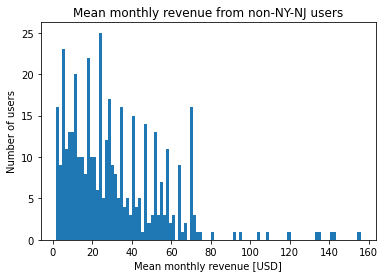

In [85]:
# Exploring the samples
print('Printing statistics of the monthly revenue of NY-NJ area users:\n',
      series_revenue_montly_mean_ny_nj.describe(), '\n')
print('The percent of NY-NJ area users in the "Surf" plan is {:.2f}%.'
    .format(100 * len(df_ny_nj_surf) / len(user_ids_ny_nj)))
print('The percent of NY-NJ area users in the "Ultimate" plan is {:.2f}%.\n'
    .format(100 * len(df_ny_nj_ultimate) / len(user_ids_ny_nj)))

plt.hist(sample_ny_nj, bins=100)
plt.title('Mean monthly revenue from NY-NJ users')
plt.ylabel('Number of users')
plt.xlabel('Mean monthly revenue [USD]')
plt.show()
print('\n')

print('Printing statistics of the monthly revenue of users outside the NY-NJ area:\n',
      series_revenue_montly_mean_not_ny_nj.describe(), '\n')
print('The percent of non NY-NJ area users in the "Surf" plan is {:.2f}%.'
    .format(100 * len(df_not_ny_nj_surf) / len(user_ids_not_ny_nj)))
print('The percent of non NY-NJ area users in the "Ultimate" plan is {:.2f}%.\n'
    .format(100 * len(df_not_ny_nj_ultimate) / len(user_ids_not_ny_nj)))

plt.hist(sample_not_ny_nj, bins=100)
plt.title('Mean monthly revenue from non-NY-NJ users')
plt.ylabel('Number of users')
plt.xlabel('Mean monthly revenue [USD]')
plt.show()

In [86]:
# Testing the hyopthesis
print('The null hypothesis is that the average revenue from users in NY-NJ area')
print('is equal to that of users from other regions.\n')

alpha = 0.05 # The critical statistical significance level
results = st.ttest_ind(sample_ny_nj, sample_not_ny_nj, equal_var=False)
print('The critical statistical significance level: {:.3f}'.format(alpha))
print('The p-value is: {:.3f}'.format(results.pvalue))

if results.pvalue < alpha: # If the p-value is less than the critical statistical significance level
    print("The null hypothesis is rejected.")
else:
    print("The null hypothesis can't be rejected.")

The null hypothesis is that the average revenue from users in NY-NJ area
is equal to that of users from other regions.

The critical statistical significance level: 0.050
The p-value is: 0.624
The null hypothesis can't be rejected.


### Conclusion

For the hypothesis test regarding the average revenue from users of "Surf" and "Ultimate" plans, I have formulated the hypotheses as follows:
- Null hypothesis: The average revenues from users of "Surf" and "Ultimate" plans are equal.
- Alternative hypothesis: The average revenues from users of "Surf" and "Ultimate" plans are different.

The hypotheses were formulated like so because when investigating whether a difference exists between populations, the null hypothesis should be formulated with an equality sign.

The criteria I used to test the hypotheses is an alpha value of 5% and non-equal population variances. I used this critical value because it's a relatively low and commonly used value. I assumed the variances of the original populations of the samples are different, since these populations don't have to have similar parameters. In fact, users who choose the cheaper plan probably have different incomes and needs than those who choose the more expensive plan.

The result of the test is that the null hypothesis is rejected - we reject the hypothesis that the average revenues from users of "Surf" and "Ultimate" plans are equal. We saw that the means are indeed quite far from each other, which is a consequence of the base plan prices being 20 USD and 70 USD, plus users not exceeding their communication limits enough in order to bring the mean revenues closer to each other. The communication consumptions of the users of both plans are in fact almost indistinguishable.

For the hypothesis test regarding the average revenue from users in the NY-NJ areas, I have formulated the hypotheses as follows:
- Null hypothesis: The average revenue from users in NY-NJ area is equal to that of users from other regions.
- Alternative hypothesis: The average revenue from users in NY-NJ area is different from that of users from other regions.

The hypotheses were formulated like so because when investigating whether a difference exists between populations, the null hypothesis should be formulated with an equality sign.

The criteria I used to test the hypotheses is an alpha value of 5% and non-equal population variances. I used this critical value because it's a relatively low and commonly used value. I assumed the variances of the original populations of the samples are different, since these populations don't have to have similar parameters. In fact, the NY-NJ area has unique features, such as a very high population, many types of developed industries and many educational facilities, which all effect the properties of the users living in the area.

The result of the test is that the null hypothesis can't be rejected - we can't reject the hypothesis that the average revenue from users in NY-NJ area is equal to that of users from other regions. This result can be explained by the variety of the residents in the NY-NJ area and the universality of the need in the popular methods of communication, which make the revenues of the area similar to that of the other regions.

## Overall conclusion

The overall conclusions from main steps of the research are:
- The data was relatively clean of issues. I had to fill nullified values in the call durations and internet traffic columns, and the dates had to be converted from strings to datetime variables.
- The "Ultimate" plan brings a higher mean revenue than the "Surf" plan, of about 40 USD versus 27 USD.
- The different statistics of the two plans are quite similar. On average, the users use calls for around 300 minutes per month, use around 12 GBs of internet traffic per month and send about 25 messages per month. The standard deviations are quite large.
- We reject the hypothesis that the average revenues from users of "Surf" and "Ultimate" plans are equal.
- We can't reject the hypothesis that the average revenue from users in NY-NJ area is equal to that of users from other regions.

In order to increase the mean profits of Megaline, we can suggest:
- Advertising the "Ultimate" plan more at the expense of the "Surf" plan, since it's more profitable on average.
- Increasing the package limits in the "Ultimate" plan, or decreasing the fees for exceeding the limits, in order to attract more users to the more profitable plan. The latter would help because on average users are very far from reaching the limits. The limit of the messages can be increased the most, since this is the least used communication method.
- The limits of the "Surf" plan could be lowered, but penalizing the customers for profit is a riskier approach.
- Megaline should prioritize pulling customers to the "Ultimate" plan in the NY-NJ area more than in the other regions, since about 75% of the users in this area are in "Surf", versus about 66% of the users in the other regions.